In [108]:
import pandas as pd
import glob
import os
import warnings
from pathlib import Path
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries loaded successfully")


enrolmentpath = r"C:\\Users\\RavindranP\\Downloads\\a\\api_data_aadhar_enrolment"
demograpicpath = r"C:\\Users\\RavindranP\\Downloads\\a\\api_data_aadhar_demographic"
biometricpath = r"C:\\Users\\RavindranP\\Downloads\\a\\api_data_aadhar_biometric"


Libraries loaded successfully


# DataSet Details

There are 3 different types of Data Available:
1> ENROLMENT DATA
2> DEMOGRAPHIC DATA
3> BIOMETRIC DATA

The datasets among these groups contains details of the enrolment in different states, Post code, Age Group, Demographics of the age group and Biometrc details of the different age group.


In [25]:
# Load all enrollment CSVs
enrollment_files = glob.glob(enrolmentpath + r"/*.csv")
print(f"📁 Found {len(enrollment_files)} enrollment files:")
for f in enrollment_files:
    print(f"   - {os.path.basename(f)}")

enrol = pd.concat(
    [pd.read_csv(f) for f in enrollment_files],
    ignore_index=True
)
print(f"\n✅ Enrollment DataFrame created: {enrol.shape[0]:,} rows × {enrol.shape[1]} columns")

📁 Found 3 enrollment files:
   - api_data_aadhar_enrolment_0_500000.csv
   - api_data_aadhar_enrolment_1000000_1006029.csv
   - api_data_aadhar_enrolment_500000_1000000.csv

✅ Enrollment DataFrame created: 1,006,029 rows × 7 columns


In [26]:
# Load all enrollment CSVs
demographic_files = glob.glob(demograpicpath + r"/*.csv")
print(f"📁 Found {len(demographic_files)} demographic files:")
for f in demographic_files:
    print(f"   - {os.path.basename(f)}")

demographic = pd.concat(
    [pd.read_csv(f) for f in demographic_files],
    ignore_index=True
)
print(f"\n✅ Demographic DataFrame created: {demographic.shape[0]:,} rows × {demographic.shape[1]} columns")

📁 Found 5 demographic files:
   - api_data_aadhar_demographic_0_500000.csv
   - api_data_aadhar_demographic_1000000_1500000.csv
   - api_data_aadhar_demographic_1500000_2000000.csv
   - api_data_aadhar_demographic_2000000_2071700.csv
   - api_data_aadhar_demographic_500000_1000000.csv

✅ Demographic DataFrame created: 2,071,700 rows × 6 columns


In [27]:
# Load all biometric CSVs
biometric_files = glob.glob(biometricpath + r"/*.csv")
print(f"📁 Found {len(biometric_files)} biometric files:")
for f in biometric_files:
    print(f"   - {os.path.basename(f)}")

bio = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)
print(f"\n✅ Biometric DataFrame created: {bio.shape[0]:,} rows × {bio.shape[1]} columns")

📁 Found 4 biometric files:
   - api_data_aadhar_biometric_0_500000.csv
   - api_data_aadhar_biometric_1000000_1500000.csv
   - api_data_aadhar_biometric_1500000_1861108.csv
   - api_data_aadhar_biometric_500000_1000000.csv

✅ Biometric DataFrame created: 1,861,108 rows × 6 columns


# Data Processing and Cleansing of the Enrolment Dataset

### View the first & Last 5 rows of the Enrolment dataset

In [28]:
enrol.head(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [29]:
enrol.tail(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,Telangana,Hyderabad,500045,4,5,1
1006025,31-12-2025,Telangana,Hyderabad,500057,0,2,0
1006026,31-12-2025,Telangana,Hyderabad,500061,4,2,0
1006027,31-12-2025,Telangana,Hyderabad,500062,1,4,0
1006028,31-12-2025,Telangana,Hyderabad,500095,0,1,0


## Check data types and number of non-null values for each column

In [31]:
enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
date              1006029 non-null object
state             1006029 non-null object
district          1006029 non-null object
pincode           1006029 non-null int64
age_0_5           1006029 non-null int64
age_5_17          1006029 non-null int64
age_18_greater    1006029 non-null int64
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [33]:
enrol.shape

(1006029, 7)

In [34]:
enrol.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [36]:
enrol.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

### Statistical Summary of Data

In [35]:
enrol.describe().T

,count,mean,std,min,25%,50%,75%,max
pincode,1006029.0,518641.454930,205635.970416,100000.0,363641.0,517417.0,700104.0,855456.0
age_0_5,1006029.0,3.525709,17.538511,0.0,1.0,2.0,3.0,2688.0
age_5_17,1006029.0,1.710074,14.369625,0.0,0.0,0.0,1.0,1812.0
age_18_greater,1006029.0,0.167344,3.220525,0.0,0.0,0.0,0.0,855.0


### Unique Values

In [37]:
ColumnNames = ["date", "state", "district", "pincode", "age_0_5", "age_5_17", "age_18_greater"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(enrol[temp].unique())

---- date --------
['02-03-2025' '09-03-2025' '15-03-2025' '20-03-2025' '23-03-2025'
 '26-03-2025' '27-03-2025' '28-03-2025' '29-03-2025' '01-04-2025'
 '01-05-2025' '01-06-2025' '01-07-2025' '01-09-2025' '02-09-2025'
 '03-09-2025' '04-09-2025' '05-09-2025' '06-09-2025' '07-09-2025'
 '08-09-2025' '09-09-2025' '10-09-2025' '11-09-2025' '12-09-2025'
 '13-09-2025' '14-09-2025' '15-09-2025' '16-09-2025' '17-09-2025'
 '18-09-2025' '19-09-2025' '20-09-2025' '21-09-2025' '22-09-2025'
 '23-09-2025' '24-09-2025' '25-09-2025' '26-09-2025' '27-09-2025'
 '28-09-2025' '29-09-2025' '30-09-2025' '13-10-2025' '15-10-2025'
 '16-10-2025' '17-10-2025' '18-10-2025' '19-10-2025' '20-10-2025'
 '21-10-2025' '22-10-2025' '23-10-2025' '24-10-2025' '25-10-2025'
 '26-10-2025' '31-12-2025' '27-10-2025' '28-10-2025' '29-10-2025'
 '30-10-2025' '31-10-2025' '01-11-2025' '02-11-2025' '03-11-2025'
 '04-11-2025' '05-11-2025' '06-11-2025' '07-11-2025' '08-11-2025'
 '09-11-2025' '10-11-2025' '11-11-2025' '12-11-2025' '13-

## Data Cleansing

In [40]:
enrol['state'] = enrol['state'].str.strip().str.title()
print(enrol['state'].unique())

['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu And Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Dadra And Nagar Haveli And Daman And Diu'
 'Ladakh' 'Andaman And Nicobar Islands' 'Orissa' 'Pondicherry'
 'Puducherry' 'Lakshadweep' 'Andaman & Nicobar Islands'
 'Dadra & Nagar Haveli' 'Dadra And Nagar Haveli' 'Daman And Diu'
 'Jammu & Kashmir' 'West  Bengal' '100000' 'Daman & Diu' 'West Bangal'
 'Westbengal']


In [43]:
enrol['state'] = enrol['state'].replace('West  Bengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('West Bangal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Westbengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Orissa', 'Odisha')
enrol['state'] = enrol['state'].replace('Puducherry', 'Pondicherry')
enrol['state'] = enrol['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
enrol['state'] = enrol['state'].replace('Daman & Diu', 'Daman And Diu')
enrol['state'] = enrol['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
# drop all rows that contain '100000'
enrol = enrol.drop(enrol[enrol['state'] == '100000'].index)

print(enrol['state'].unique())




['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu And Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Ladakh' 'Andaman And Nicobar Islands'
 'Pondicherry' 'Lakshadweep' 'Dadra & Nagar Haveli' 'Daman And Diu']


In [ ]:
# Find all characters that aren't alphanumeric or spaces
enrol['district'] = enrol['district'].replace('?', 'unknown')
enrol['district'] = enrol['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchal?malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Deeg\xa0', 'Deeg')


In [44]:
enrol.shape

(1006007, 7)

# Data Processing and cleansing of the Demographic Dataset

### View the first & Last 5 rows of the Demographic dataset

In [45]:
demographic.head(5)

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [46]:
demographic.tail(5)

,date,state,district,pincode,demo_age_5_17,demo_age_17_
2071695,31-10-2025,Uttar Pradesh,Etah,207250,2,17
2071696,31-10-2025,Uttar Pradesh,Etah,207401,1,27
2071697,31-10-2025,Uttar Pradesh,Etawah,206003,3,10
2071698,31-10-2025,Uttar Pradesh,Etawah,206125,1,25
2071699,31-10-2025,Uttar Pradesh,Etawah,206126,1,25


## Check data types and number of non-null values for each column

In [47]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
date             object
state            object
district         object
pincode          int64
demo_age_5_17    int64
demo_age_17_     int64
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [49]:
demographic.shape

(2071700, 6)

In [50]:
demographic.isna().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

### Statistical Summary of Data

In [51]:
demographic.describe().T

,count,mean,std,min,25%,50%,75%,max
pincode,2071700.0,527831.782277,197293.323331,100000.0,396469.0,524322.0,695507.0,855456.0
demo_age_5_17,2071700.0,2.347552,14.903554,0.0,0.0,1.0,2.0,2690.0
demo_age_17_,2071700.0,21.447006,125.249766,0.0,2.0,6.0,15.0,16166.0


### Unique Values

In [52]:
ColumnNames = ["date", "state", "district", "pincode", "demo_age_5_17", "demo_age_17_"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(demographic[temp].unique())

---- date --------
['01-03-2025' '01-04-2025' '01-05-2025' '01-06-2025' '01-07-2025'
 '01-09-2025' '02-09-2025' '03-09-2025' '04-09-2025' '06-09-2025'
 '05-09-2025' '07-09-2025' '08-09-2025' '09-09-2025' '10-09-2025'
 '11-09-2025' '12-09-2025' '13-09-2025' '14-09-2025' '15-09-2025'
 '16-09-2025' '17-09-2025' '19-09-2025' '18-09-2025' '20-09-2025'
 '13-10-2025' '15-10-2025' '16-10-2025' '17-10-2025' '18-10-2025'
 '26-10-2025' '14-11-2025' '13-11-2025' '15-11-2025' '21-10-2025'
 '20-10-2025' '24-10-2025' '23-10-2025' '22-10-2025' '25-10-2025'
 '18-11-2025' '17-11-2025' '19-11-2025' '01-12-2025' '27-10-2025'
 '28-10-2025' '29-10-2025' '30-10-2025' '03-12-2025' '02-12-2025'
 '04-12-2025' '05-12-2025' '31-10-2025' '01-11-2025' '02-11-2025'
 '03-11-2025' '06-12-2025' '07-12-2025' '08-12-2025' '09-12-2025'
 '05-11-2025' '04-11-2025' '06-11-2025' '07-11-2025' '08-11-2025'
 '10-12-2025' '11-12-2025' '12-12-2025' '14-12-2025' '13-12-2025'
 '09-11-2025' '10-11-2025' '11-11-2025' '12-11-2025' '15-

## Data Cleansing

In [ ]:
demographic['state'] = demographic['state'].str.strip().str.title()
print(demographic['state'].unique())

In [59]:
demographic['state'] = demographic['state'].replace('West  Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bangal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('WEST BENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('WESTBENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('West bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bengli', 'West Bengal')
demographic['state'] = demographic['state'].replace('west Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('ODISHA', 'Odisha')
demographic['state'] = demographic['state'].replace('Orissa', 'Odisha')
demographic['state'] = demographic['state'].replace('odisha', 'Odisha')
demographic['state'] = demographic['state'].replace('andhra pradesh', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Puducherry', 'Pondicherry')
demographic['state'] = demographic['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Chhatisgarh', 'Chhattisgarh')

demographic['state'] = demographic['state'].replace('Daman & Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Daman and Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Darbhanga', 'Bihar')
demographic['state'] = demographic['state'].replace('Puttenahalli', 'Karnataka')
demographic['state'] = demographic['state'].replace('BALANAGAR', 'Telangana')
demographic['state'] = demographic['state'].replace('Jaipur', 'Rajasthan')
demographic['state'] = demographic['state'].replace('Nagpur', 'Maharashtra')
demographic['state'] = demographic['state'].replace('Madanapalle', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Raja Annamalai Puram', 'Tamil Nadu')

# drop all rows that contain '100000'
demographic = demographic.drop(demographic[demographic['state'] == '100000'].index)

print(demographic['state'].unique())

['Uttar Pradesh' 'Andhra Pradesh' 'Gujarat' 'Rajasthan' 'Karnataka'
 'West Bengal' 'Telangana' 'Odisha' 'Maharashtra' 'Kerala' 'Bihar'
 'Tamil Nadu' 'Madhya Pradesh' 'Assam' 'Tripura' 'Arunachal Pradesh'
 'Punjab' 'Jharkhand' 'Delhi' 'Chandigarh' 'Chhattisgarh'
 'Jammu And Kashmir' 'Mizoram' 'Nagaland' 'Himachal Pradesh' 'Goa'
 'Haryana' 'Meghalaya' 'Uttarakhand' 'Manipur' 'Daman And Diu'
 'Pondicherry' 'Sikkim' 'Ladakh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Dadra & Nagar Haveli'
 'Andaman And Nicobar Islands' 'Lakshadweep' 'Uttaranchal']


In [ ]:
# Find all characters that aren't alphanumeric or spaces
demographic['district'] = demographic['district'].replace('?', 'unknown')
demographic['district'] = demographic['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
demographic['district'] = demographic['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')


In [60]:
demographic.shape

(2071698, 6)

# Data Processing of the Biometric Dataset

### View the first & Last 5 rows of the Biometric dataset

In [62]:
bio.head(5)

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [63]:
bio.tail(5)

,date,state,district,pincode,bio_age_5_17,bio_age_17_
1861103,07-11-2025,Kerala,Ernakulam,682020,1,6
1861104,07-11-2025,Kerala,Ernakulam,682022,1,0
1861105,07-11-2025,Kerala,Ernakulam,682023,0,1
1861106,07-11-2025,Kerala,Ernakulam,682025,3,6
1861107,07-11-2025,Kerala,Ernakulam,682026,1,3


## Check data types and number of non-null values for each column

In [64]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
date            object
state           object
district        object
pincode         int64
bio_age_5_17    int64
bio_age_17_     int64
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [65]:
bio.shape

(1861108, 6)

In [66]:
bio.isna().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [67]:
bio.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

### Statistical Summary of Data

In [68]:
bio.describe().T

,count,mean,std,min,25%,50%,75%,max
pincode,1861108.0,521761.170145,198162.675855,110001.0,391175.0,522401.0,686636.25,855456.0
bio_age_5_17,1861108.0,18.390580,83.704209,0.0,1.0,3.0,11.00,8002.0
bio_age_17_,1861108.0,19.094131,88.065018,0.0,1.0,4.0,10.00,7625.0


### Unique Values

In [69]:
ColumnNames = ["date", "state", "district", "pincode", "bio_age_5_17", "bio_age_17_"]
for temp in ColumnNames:
      print("----",temp,"--------")
      print(bio[temp].unique())

---- date --------
['01-03-2025' '01-04-2025' '01-05-2025' '01-06-2025' '01-07-2025'
 '01-09-2025' '02-09-2025' '03-09-2025' '04-09-2025' '05-09-2025'
 '06-09-2025' '07-09-2025' '08-09-2025' '09-09-2025' '10-09-2025'
 '11-09-2025' '12-09-2025' '13-09-2025' '14-09-2025' '15-09-2025'
 '16-09-2025' '17-09-2025' '18-09-2025' '19-09-2025' '07-11-2025'
 '08-11-2025' '09-11-2025' '10-11-2025' '11-11-2025' '12-11-2025'
 '13-11-2025' '14-11-2025' '15-11-2025' '16-11-2025' '17-11-2025'
 '18-11-2025' '19-11-2025' '25-11-2025' '01-12-2025' '02-12-2025'
 '03-12-2025' '04-12-2025' '05-12-2025' '06-12-2025' '07-12-2025'
 '08-12-2025' '09-12-2025' '10-12-2025' '11-12-2025' '12-12-2025'
 '13-12-2025' '14-12-2025' '15-12-2025' '16-12-2025' '18-12-2025'
 '19-12-2025' '20-12-2025' '22-12-2025' '23-12-2025' '25-12-2025'
 '26-12-2025' '27-12-2025' '28-12-2025' '29-12-2025' '20-09-2025'
 '13-10-2025' '15-10-2025' '16-10-2025' '17-10-2025' '18-10-2025'
 '19-10-2025' '20-10-2025' '21-10-2025' '22-10-2025' '23-

## Data Cleansing

In [ ]:
bio['state'] = bio['state'].str.strip().str.title()
print(bio['state'].unique())

In [71]:
bio['state'] = bio['state'].replace('West  Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bangal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('WEST BENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('WESTBENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('West bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bengli', 'West Bengal')
bio['state'] = bio['state'].replace('west Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('ODISHA', 'Odisha')
bio['state'] = bio['state'].replace('Orissa', 'Odisha')
bio['state'] = bio['state'].replace('odisha', 'Odisha')
bio['state'] = bio['state'].replace('andhra pradesh', 'Andhra Pradesh')
bio['state'] = bio['state'].replace('Puducherry', 'Pondicherry')
bio['state'] = bio['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Chhatisgarh', 'Chhattisgarh')

bio['state'] = bio['state'].replace('Daman & Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Daman and Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
bio['state'] = bio['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')

bio['state'] = bio['state'].replace('Tamilnadu', 'Tamil Nadu')


print(bio['state'].unique())

['Haryana' 'Bihar' 'Jammu And Kashmir' 'Tamil Nadu' 'Maharashtra'
 'Gujarat' 'Odisha' 'West Bengal' 'Kerala' 'Rajasthan' 'Punjab'
 'Himachal Pradesh' 'Uttar Pradesh' 'Assam' 'Uttarakhand' 'Madhya Pradesh'
 'Karnataka' 'Andhra Pradesh' 'Telangana' 'Goa' 'Nagaland' 'Jharkhand'
 'Delhi' 'Chhattisgarh' 'Meghalaya' 'Chandigarh' 'Pondicherry' 'Manipur'
 'Sikkim' 'Tripura' 'Mizoram' 'Arunachal Pradesh' 'Ladakh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Daman And Diu'
 'Andaman And Nicobar Islands' 'Dadra & Nagar Haveli' 'Lakshadweep'
 'Uttaranchal']


In [72]:
bio.shape

(1861108, 6)

In [73]:
bio['district'] = bio['district'].str.strip().str.title()
print(bio['district'].unique())

['Mahendragarh' 'Madhepura' 'Punch' 'Bhojpur' 'Madurai' 'Ratnagiri'
 'Anand' 'Gandhinagar' 'Dhenkanal' 'Valsad' 'Salem' 'Hooghly'
 'Paschim Medinipur' 'Wayanad' 'Sawai Madhopur' 'Vaishali' 'Karur'
 'Rupnagar' 'Sabarkantha' 'Una' 'Bhilwara' 'Bara Banki' 'Cachar'
 'Dehradun' 'Chamba' 'Shajapur' 'The Nilgiris' 'Wardha' 'Nabarangapur'
 'Shaheed Bhagat Singh Nagar' 'Davangere' 'Dahod' 'Tiruppur'
 'Vizianagaram' 'Moga' 'Rajkot' 'Hyderabad' 'Sundergarh' 'Kurnool'
 'Warangal' 'Tirunelveli' 'South Goa' 'Anantapur' 'Thiruvananthapuram'
 'Srikakulam' 'Nizamabad' 'Cuttack' 'Baran' 'Guntur' 'Mysuru'
 'Purba Medinipur' 'Ernakulam' 'Balaghat' 'Sivaganga' 'Harda *'
 'Mokokchung' 'Uttara Kannada' 'Perambalur' 'Udupi' 'Ananthapur'
 'Coimbatore' 'West Singhbhum' 'Tumakuru' 'Birbhum' 'Visakhapatnam'
 'Hardoi' 'Siddharthnagar' 'Dhanbad' 'Darbhanga' 'Jabalpur'
 'North 24 Parganas' 'Tumkur' 'Leh' 'West Godavari' 'Kaithal' 'Kachchh'
 'Krishna' 'Kannur' 'Shivamogga' 'Bankura' 'Rajsamand' 'Namakkal'
 'Thiruvaru

In [83]:
# Find all characters that aren't alphanumeric or spaces
bio['district'] = bio['district'].replace('?', 'unknown')
bio['district'] = bio['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')

## More Data Analysis

### Based on Enrolment

In [85]:
groupingenrolment = enrol

state                        district                    
Andaman And Nicobar Islands  Andamans                          1.044776
                             Nicobar                           1.684211
                             Nicobars                          1.000000
                             North And Middle Andaman          1.292929
                             South Andaman                     1.155080
Andhra Pradesh               Adilabad                          1.306897
                             Alluri Sitharama Raju             1.487214
                             Anakapalli                        1.180587
                             Anantapur                         1.591051
                             Ananthapur                        1.296974
                             Ananthapuramu                     1.534316
                             Annamayya                         1.238231
                             Bapatla                           1.016908
      

In [95]:
# Group by state, sum the 'age_0_5' column, and find the index (state name) with the maximum value
most_enrolled_state_under5 = groupingenrolment.groupby('state')['age_0_5'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_0_5'].sum().sort_values(ascending=False)

print(f"The state with the most children less than 1 year enrolled is: {most_enrolled_state_under5}")
print(state_totals.head())

The state with the most children less than 1 year enrolled is: Uttar Pradesh
state
Uttar Pradesh     521045
Madhya Pradesh    367990
Maharashtra       278814
West Bengal       275420
Bihar             262875
Name: age_0_5, dtype: int64


In [97]:
# Group by state, sum the 'age_5_17' column, and find the index (state name) with the maximum value
most_enrolled_state_age5to17 = groupingenrolment.groupby('state')['age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most young population with age of 5-17 enrolled is: {most_enrolled_state_age5to17}")
print(state_totals.head())

The state with the most young population with age of 5-17 enrolled is: Uttar Pradesh
state
Uttar Pradesh     479682
Bihar             334802
Madhya Pradesh    116381
Rajasthan         113123
West Bengal        91410
Name: age_5_17, dtype: int64


In [98]:
# Group by state, sum the 'age_18_greater' column, and find the index (state name) with the maximum value
most_enrolled_state_Adults = groupingenrolment.groupby('state')['age_18_greater'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_18_greater'].sum().sort_values(ascending=False)

print(f"The state with the most adults enrolled is: {most_enrolled_state_Adults}")
print(state_totals.head())

The state with the most adults enrolled is: Meghalaya
state
Meghalaya        35287
Assam            22877
Uttar Pradesh    17902
Gujarat          16336
Bihar            11908
Name: age_18_greater, dtype: int64


### Based on Demography

In [99]:
groupingdemographic = demographic
# Group by state, sum the 'demo_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_5to17 = groupingdemographic.groupby('state')['demo_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population in the age group of 5-17 as per Adhaar data is: {most_state_population_5to17}")
print(state_totals.head())

The state with the most population in the age group of 5-17 is: Uttar Pradesh
state
Uttar Pradesh     790308
Madhya Pradesh    407098
Bihar             380023
Andhra Pradesh    321148
Tamil Nadu        315638
Name: demo_age_5_17, dtype: int64


In [100]:
# Group by state, sum the 'demo_age_17_' column, and find the index (state name) with the maximum value
most_state_population_adults = groupingdemographic.groupby('state')['demo_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population in the adults category as per Adhaar data is: {most_state_population_adults}")
print(state_totals.head())

The state with the most population in the adults category is: Uttar Pradesh
state
Uttar Pradesh    7752020
Maharashtra      4781281
Bihar            4434329
West Bengal      3630176
Rajasthan        2560393
Name: demo_age_17_, dtype: int64


### Based on Biometric Given

In [101]:
groupingbio = bio
# Group by state, sum the 'bio_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_5to17 = groupingbio.groupby('state')['bio_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: {most_state_population_biometricdataavailable_5to17}")
print(state_totals.head())

The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: Uttar Pradesh
state
Uttar Pradesh     6207105
Maharashtra       3512712
Madhya Pradesh    3200117
Andhra Pradesh    2241467
Tamil Nadu        2227253
Name: bio_age_5_17, dtype: int64


In [102]:
# Group by state, sum the 'bio_age_17_' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_Adults = groupingbio.groupby('state')['bio_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the adults category as per Adhaar data is: {most_state_population_biometricdataavailable_Adults}")
print(state_totals.head())

The state with the most population who has given Biometric in the adults category as per Adhaar data is: Maharashtra
state
Maharashtra       5713427
Uttar Pradesh     3370630
Madhya Pradesh    2723654
Bihar             2689446
Tamil Nadu        2470865
Name: bio_age_17_, dtype: int64


# Univariate Analysis

## Understanding the distribution of State, Age 

In [111]:
!pip install --upgrade seaborn
import seaborn as sns
print(sns.__version__)

  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ea/bc/da526221bc111857c7ef39c3af670bbcf5e69c247b0d22e51986f6d0c5c2/numpy-1.19.5-cp36-cp36m-win_amd64.whl
Requirement not upgraded as not directly required: pandas>=0.23 in c:\programdata\anaconda3\lib\site-packages (from seaborn) (0.23.0)
Requirement not upgraded as not directly required: scipy>=1.0 in c:\programdata\anaconda3\lib\site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: matplotlib>=2.2 in c:\programdata\anaconda3\lib\site-packages (from seaborn) (2.2.2)
Requirement not upgraded as not directly required: pytz>=2011k in c:\programdata\anaconda3\lib\site-packages (from pandas>=0.23->seaborn) (2018.4)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in c:\programdata\anaconda3\lib\site-packages (from pandas>=0.23

distributed 1.21.8 requires msgpack, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\add_newdocs.py'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


AttributeError: module 'seaborn' has no attribute 'histplot'

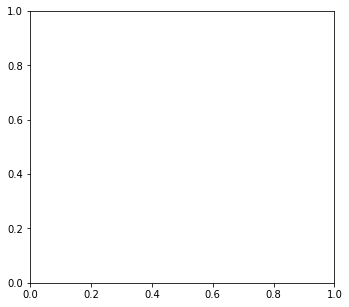

In [109]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(data=enrol, x='state', kde = True, alpha =1,color = 'Navy', edgecolor = 'black'). set(title='Histogram for state Distribution')       # creating a histogram for the Age
plt.subplot(1,2,2)
sns.boxplot(data = enrol, y='age_0_5',color = 'Orange').set(title='BoxPlot for Age Distribution')      # creating a boxplot for the Age